In [1]:
import pandas as pd
from pathlib import Path

from classifier.training.utils import set_seed
from notebooks.notebook_utils import plot_label_dist

set_seed(42)

SRC_DATASET_ROOT = Path('./fn-content-dataset')
SRC_DATASET_NAME = 'images__positions.parquet'

In [2]:
df = pd.read_parquet(SRC_DATASET_NAME)
df

,file_name,69,bent over,closeup,cowgirl,doggystyle,fpov,facesitting,flexible,g missionary,kneeling,laying down,mpov,missionary,orgy,rev cowgirl,sitting,squatting,stand cradle,upskirt
0,0.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2.jpg,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,4.jpg,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625134,625141.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
625135,625142.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
625136,625143.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
625137,625144.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


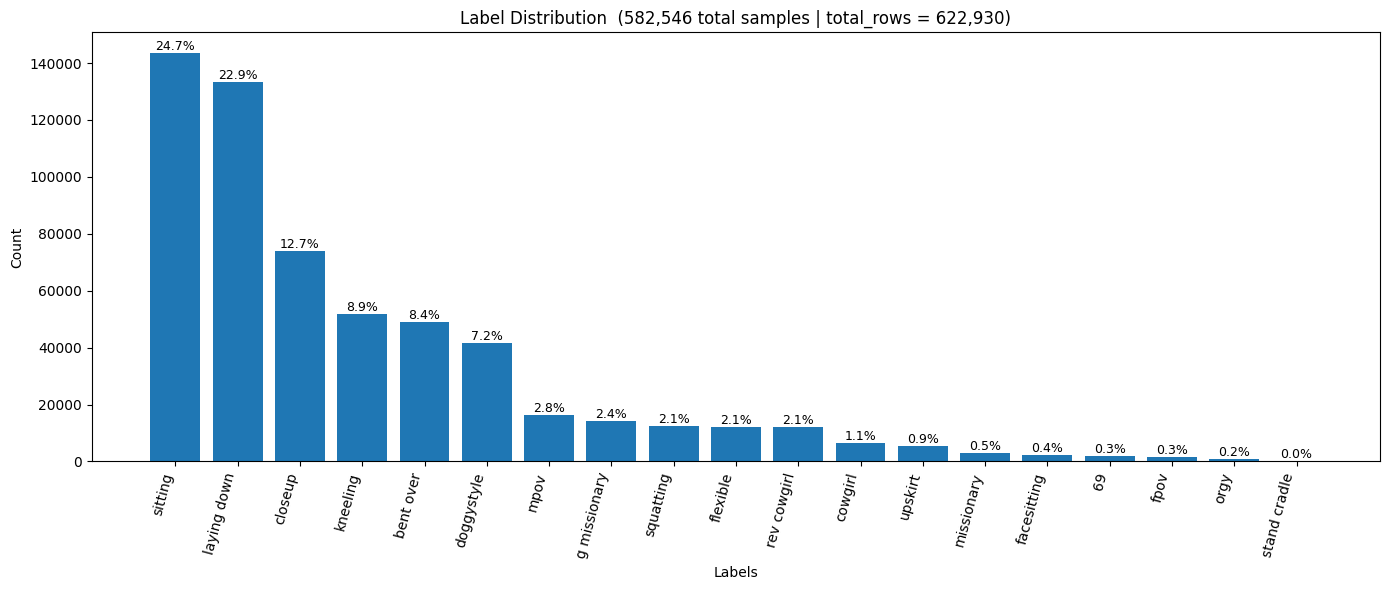

In [3]:
filtered_counts = plot_label_dist(df.drop(['file_name'], axis=1))

In [4]:
non_empty_rows = df.drop(['file_name'], axis=1).sum(axis=1) != 0
df = df.loc[non_empty_rows]
df = df.drop(['69', 'fpov', 'orgy', 'stand cradle'], axis=1, inplace=False)
df

,file_name,bent over,closeup,cowgirl,doggystyle,facesitting,flexible,g missionary,kneeling,laying down,mpov,missionary,rev cowgirl,sitting,squatting,upskirt
0,0.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.jpg,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2.jpg,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3.jpg,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,4.jpg,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625133,625140.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
625134,625141.jpg,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
625135,625142.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
625137,625144.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


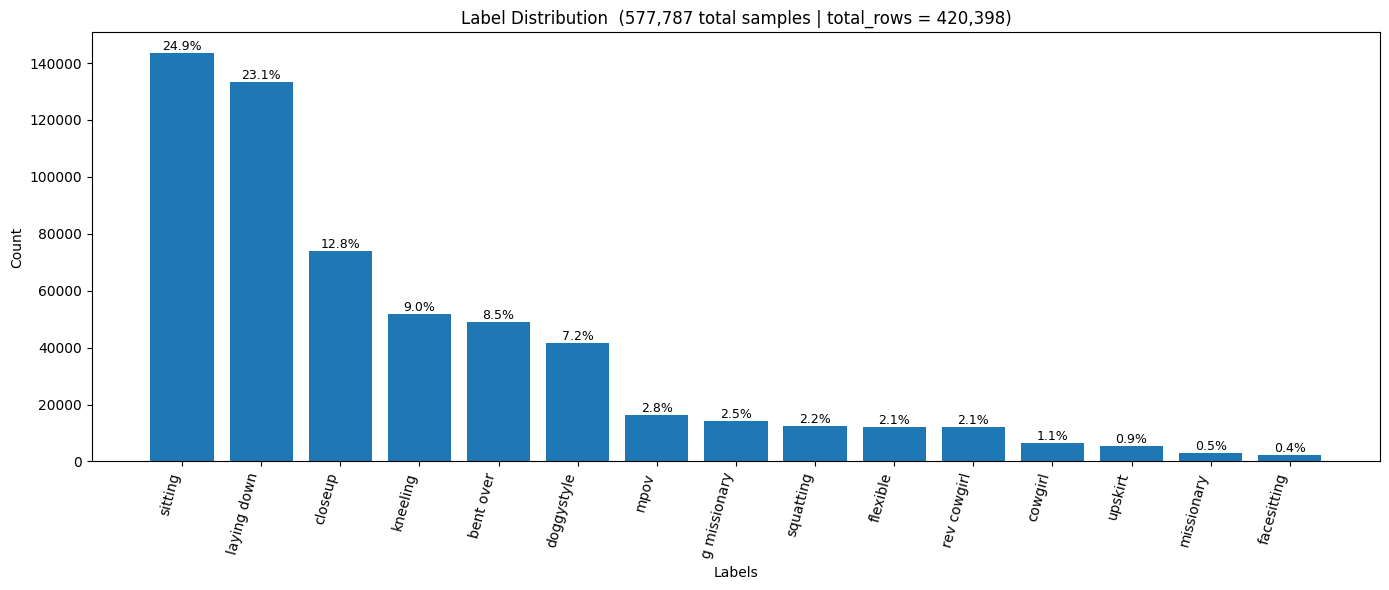

In [5]:
_ = plot_label_dist(df.drop(['file_name'], axis=1))

In [6]:
majors = ['sitting', 'laying down', 'closeup', 'kneeling', 'bent over', 'doggystyle']
positions_major = df[['file_name'] + majors]
positions_minor = df.drop(majors, axis=1, inplace=False)
positions_major.shape, positions_minor.shape

((420398, 7), (420398, 10))

In [7]:
def remove_empty_rows(dataframe: pd.DataFrame):
    non_empty_rows = dataframe.drop(['file_name'], axis=1).sum(axis=1) != 0
    return dataframe.loc[non_empty_rows]

positions_major = remove_empty_rows(positions_major)
positions_minor = remove_empty_rows(positions_minor)

positions_major.shape, positions_minor.shape

((405519, 7), (78429, 10))

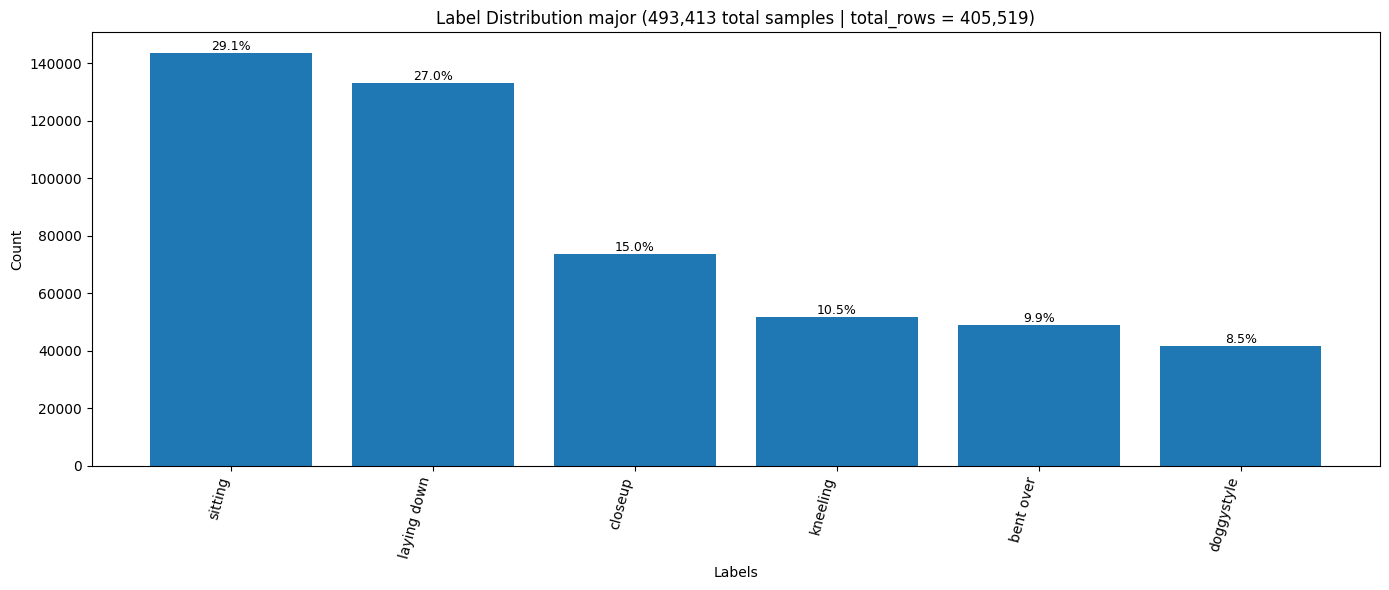

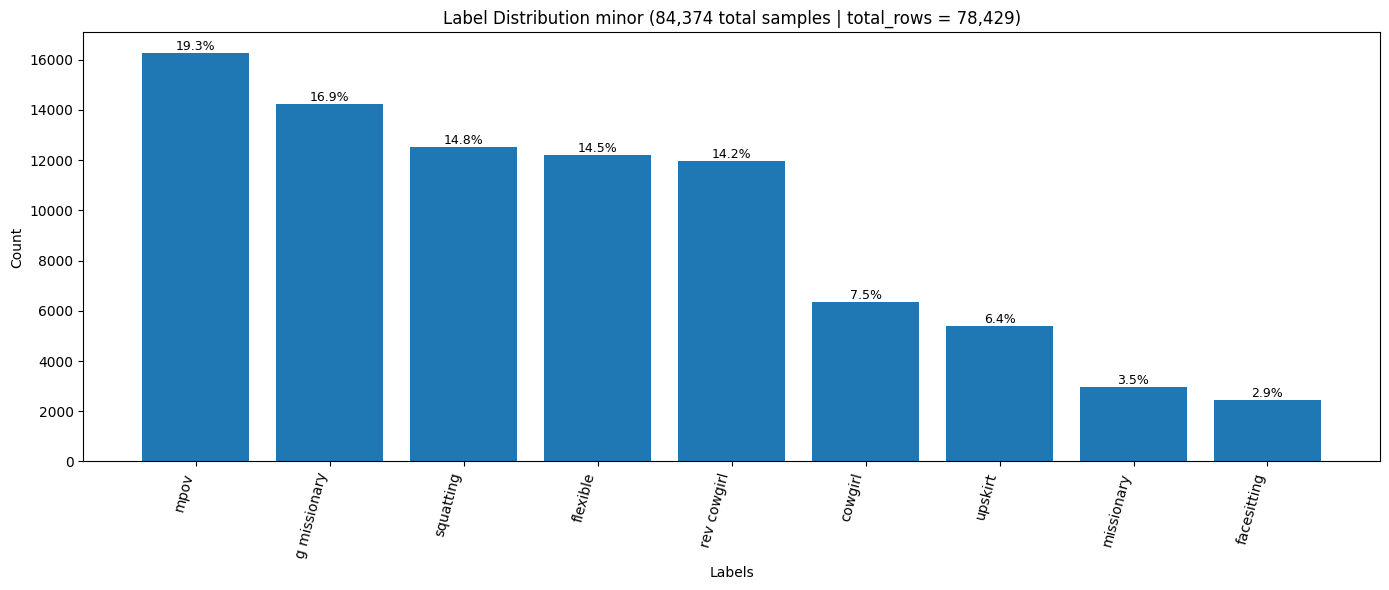

In [8]:
_ = plot_label_dist(positions_major, 'major')
_ = plot_label_dist(positions_minor, 'minor')

In [9]:
positions_major.to_parquet('/Users/milosz/Projects/fn-classifier-final/datasets/positions_major_dataset.parquet')
positions_minor.to_parquet('/Users/milosz/Projects/fn-classifier-final/datasets/positions_minor_dataset.parquet')